<a href="https://colab.research.google.com/github/Anup-Sarkar-DD/GoogleColab_repo/blob/main/SystemErrorDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras

import os

In [65]:
df = pd.read_csv('root_cause_analysis.csv')
df.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   CPU_LOAD          1000 non-null   int64 
 2   MEMORY_LEAK_LOAD  1000 non-null   int64 
 3   DELAY             1000 non-null   int64 
 4   ERROR_1000        1000 non-null   int64 
 5   ERROR_1001        1000 non-null   int64 
 6   ERROR_1002        1000 non-null   int64 
 7   ERROR_1003        1000 non-null   int64 
 8   ROOT_CAUSE        1000 non-null   object
dtypes: int64(8), object(1)
memory usage: 70.4+ KB


In [67]:
x = df.iloc[:,1:8]
y = df.iloc[:,-1]


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.10)

In [70]:
#convert data
from sklearn.preprocessing import LabelEncoder
LEC = LabelEncoder()
y_train= LEC.fit_transform(y_train)
y_test = LEC.transform(y_test)

In [71]:

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()


In [72]:
#y vector convert
y_train = tf.keras.utils.to_categorical(y_train,3)
y_test = tf.keras.utils.to_categorical(y_test,3)


In [73]:
from keras import Sequential
from keras.layers import Dense

In [74]:
model = Sequential()
model.add(Dense(128, input_shape=(7,), name = 'hidden-layer-1', activation='relu'))
model.add(Dense(128, name = 'hidden-layer-2', activation = 'relu'))
model.add(Dense(3, name='output-layer', activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

summary = model.summary()
summary

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-1 (Dense)          │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-2 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,923 (70.01 KB)

 Trainable params: 17,923 (70.01 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
cont1 = model.fit(x_train, y_train, epochs=20, batch_size=64, verbose = 1, validation_split=0.2)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4948 - loss: 1.0068 - val_accuracy: 0.7500 - val_loss: 0.8583
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7851 - loss: 0.7970 - val_accuracy: 0.8000 - val_loss: 0.6814
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8089 - loss: 0.6388 - val_accuracy: 0.8333 - val_loss: 0.5655
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8157 - loss: 0.5255 - val_accuracy: 0.8222 - val_loss: 0.5063
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8492 - loss: 0.4499 - val_accuracy: 0.8167 - val_loss: 0.4866
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8085 - loss: 0.4709 - val_accuracy: 0.8167 - val_loss: 0.4820
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8486 - loss: 0.4246 - val_accuracy: 0.8222 - val_loss: 0.4781
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8221 - loss: 0.4696 - val_accuracy: 0.8167 - val_loss

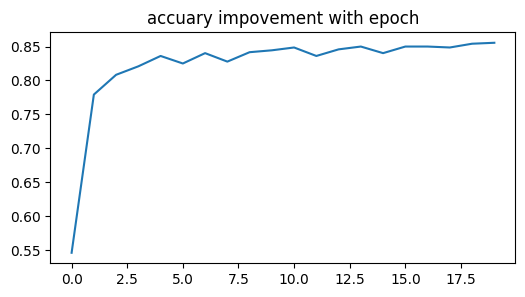

In [76]:
pd.DataFrame(cont1.history)['accuracy'].plot(figsize=(6,3))
plt.title("accuary impovement with epoch")
plt.show()

In [77]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8275 - loss: 0.4013 


[0.3811318874359131, 0.8500000238418579]

In [86]:
# prompt: make it more simple lets say this are values 0, 0, 1, 0, 0, 1, 0 then pass this into model.predict 2 or 3 line code add inverse lce
predicted_class_index = np.argmax(model.predict( np.array([[0, 0, 1, 0, 0, 1, 0]])))
predicted_class_label = LEC.inverse_transform([predicted_class_index])[0]
print(f"Prediction: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: NETWORK_DELAY


In [85]:
prediction=np.argmax(model.predict(np.array([[0, 0, 1, 0, 0, 1, 0]])), axis=1 )

print(LEC.inverse_transform(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
['NETWORK_DELAY']
